# Análise Exploratória de Dados Financeiros de ETFs no Brasil
### Propósitos:
#### __O presente projeto visa avaliar o desempenho dos ETFs ao longo do tempo, determinar retornos, volatilidade/estabilidade, compreender a correlação entre os ativos, calcular Sharpe Ratio e Sortino Ratio__

### ETF's Analisados:
🔹 BOVA11 (replica o Ibovespa) <br>
🔹 IVVB11 (replica o S&P 500 em reais)  <br>
🔹 SMAL11 (focado em small caps brasileiras)  <br>
🔹 MATB11 (empresas de materiais básicos)  <br>

### Período:
**2019 - 2024**

----------------------------

In [2]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Trazendo os dados financeiros que usaremos
# Lista de ETFs (removendo FIIs)
tickers = ["BOVA11.SA", "IVVB11.SA", "SMAL11.SA", "MATB11.SA"]

# Baixar os dados (usando "Close" e "Volume" para evitar erro com "Adj Close")
dados = yf.download(tickers, start="2019-01-01", end="2025-01-01")[["Close", "Volume"]]

# Resetar index para remover multi-index e melhorar organização
dados = dados.reset_index()

# Exibir os primeiros registros
dados

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


Price        Date       Close                                      Volume  \
Ticker              BOVA11.SA   IVVB11.SA  MATB11.SA  SMAL11.SA BOVA11.SA   
0      2019-01-02   87.900002  100.519997  32.160000  89.000000   5021260   
1      2019-01-03   88.000000   97.989998  31.200001  89.000000   4300220   
2      2019-01-04   88.500000   99.699997  32.570000  90.500000   2438230   
3      2019-01-07   88.480003  101.150002  32.490002  88.199997   2891350   
4      2019-01-08   88.830002  101.199997  32.349998  88.830002   3441770   
...           ...         ...         ...        ...        ...       ...   
1474   2024-12-20  119.050003  403.450012  55.200001  88.980003   6972532   
1475   2024-12-23  117.699997  413.500000  55.130001  85.699997   6218302   
1476   2024-12-26  117.959999  417.200012  55.220001  85.470001   3231104   
1477   2024-12-27  117.260002  412.899994  54.520000  85.650002   6917466   
1478   2024-12-30  117.269997  407.700012  54.529999  85.949997   6590812   

Price                                 
Ticker IVVB11.SA MATB11.SA SMAL11.SA  
0          69360     960.0    201750  
1         171650     290.0    113960  
2          94090     970.0    170850  
3          38620     110.0    262070  
4          35370     320.0    106870  
...          ...       ...       ...  
1474      329015   47499.0   3952340  
1475      337963    1863.0   1510757  
1476      171647    5267.0   1831351  
1477      275964    1166.0   1141093  
1478      276116     196.0   1409576  

[1479 rows x 9 columns]

## Cálculos de Retorno Diário e Retorno Acumulado
### Retorno Diário:
O retorno diário é a variação percentual do preço de fechamento de um ativo de um dia para o outro, ou seja, o quanto o preço do ativo subiu ou caiu em relação ao preço de fechamento do dia anterior.
Sua fórmula é:
RetornoDiário = (Preço de fechamento no dia atual - preço de fechamento no dia anterior) / preço de fechamento no dia anterior

----------------------------

### Retorno Acumulado:
O retorno acumulado mostra o desempenho total de um ativo em um determinado período de tempo, crescimento ou perda, considerando os efeitos dos retornos diários

In [7]:
for ticker in tickers:
    dados[f"Retorno Diário {ticker}"] = dados["Close"][ticker].pct_change(fill_method=None)
    dados[f"Retorno Acumulado {ticker}"] = (1 + dados[f"Retorno Diário {ticker}"]).cumprod() - 1

In [9]:
dados

Price        Date       Close                                      Volume  \
Ticker              BOVA11.SA   IVVB11.SA  MATB11.SA  SMAL11.SA BOVA11.SA   
0      2019-01-02   87.900002  100.519997  32.160000  89.000000   5021260   
1      2019-01-03   88.000000   97.989998  31.200001  89.000000   4300220   
2      2019-01-04   88.500000   99.699997  32.570000  90.500000   2438230   
3      2019-01-07   88.480003  101.150002  32.490002  88.199997   2891350   
4      2019-01-08   88.830002  101.199997  32.349998  88.830002   3441770   
...           ...         ...         ...        ...        ...       ...   
1474   2024-12-20  119.050003  403.450012  55.200001  88.980003   6972532   
1475   2024-12-23  117.699997  413.500000  55.130001  85.699997   6218302   
1476   2024-12-26  117.959999  417.200012  55.220001  85.470001   3231104   
1477   2024-12-27  117.260002  412.899994  54.520000  85.650002   6917466   
1478   2024-12-30  117.269997  407.700012  54.529999  85.949997   6590812   

Price                                Retorno Diário BOVA11.SA  \
Ticker IVVB11.SA MATB11.SA SMAL11.SA                            
0          69360     960.0    201750                      NaN   
1         171650     290.0    113960                 0.001138   
2          94090     970.0    170850                 0.005682   
3          38620     110.0    262070                -0.000226   
4          35370     320.0    106870                 0.003956   
...          ...       ...       ...                      ...   
1474      329015   47499.0   3952340                 0.009069   
1475      337963    1863.0   1510757                -0.011340   
1476      171647    5267.0   1831351                 0.002209   
1477      275964    1166.0   1141093                -0.005934   
1478      276116     196.0   1409576                 0.000085   

Price  Retorno Acumulado BOVA11.SA Retorno Diário IVVB11.SA  \
Ticker                                                        
0                              NaN                      NaN   
1                         0.001138                -0.025169   
2                         0.006826                 0.017451   
3                         0.006598                 0.014544   
4                         0.010580                 0.000494   
...                            ...                      ...   
1474                      0.354380                 0.002734   
1475                      0.339022                 0.024910   
1476                      0.341979                 0.008948   
1477                      0.334016                -0.010307   
1478                      0.334130                -0.012594   

Price  Retorno Acumulado IVVB11.SA Retorno Diário SMAL11.SA  \
Ticker                                                        
0                              NaN                      NaN   
1                        -0.025169                 0.000000   
2                        -0.008158                 0.016854   
3                         0.006267                -0.025414   
4                         0.006765                 0.007143   
...                            ...                      ...   
1474                      3.013629                 0.020530   
1475                      3.113609                -0.036862   
1476                      3.150418                -0.002684   
1477                      3.107640                 0.002106   
1478                      3.055910                 0.003503   

Price  Retorno Acumulado SMAL11.SA Retorno Diário MATB11.SA  \
Ticker                                                        
0                              NaN                      NaN   
1                         0.000000                -0.029851   
2                         0.016854                 0.043910   
3                        -0.008989                -0.002456   
4                        -0.001910                -0.004309   
...                            ...                      ...   
1474    

In [11]:
dados.to_csv('dados.csv', index=False)

In [13]:
# Conferir estatísticas dos retornos diários
dados[[f"Retorno Diário {ticker}" for ticker in tickers]].describe()

Price,Retorno Diário BOVA11.SA,Retorno Diário IVVB11.SA,Retorno Diário SMAL11.SA,Retorno Diário MATB11.SA
Ticker,,,,
count,1478.000000,1478.000000,1478.000000,1476.000000
mean,0.000320,0.001038,0.000159,0.000528
std,0.015737,0.013433,0.018964,0.018378
min,-0.145747,-0.087316,-0.174359,-0.189655
25%,-0.007285,-0.006768,-0.009604,-0.009610
50%,0.000873,0.000809,0.000528,0.000431
75%,0.008441,0.008370,0.010691,0.010423
max,0.133951,0.102756,0.115561,0.119149


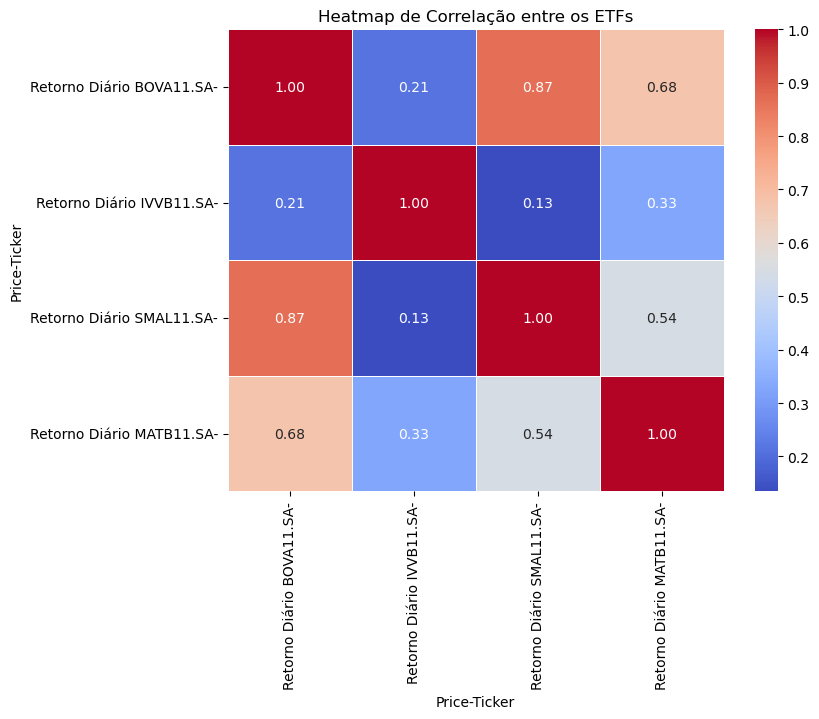

In [15]:
# Calculando a matriz de correlação entre os retornos diários
correlacao = dados[[f'Retorno Diário {ticker}' for ticker in tickers]].corr()

# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlação entre os ETFs')
plt.show()

### Correlação entre os retornos
Os maiores valores de correlação de retornos estão entre:
* BOVA11 e SMAL11 - Podemos inferir que a boa performance dos maiores players da nossa bols (BOVA11)a, afetam positivamente empresas menores (Small Cap - SMAL11s). A correlação de 0,87 é alta e positiva;

* BOVA11 e MATB11 - A correlação é menor que no caso acima, mas ainda relevante, 0,68. O MATB11 é composto por empresas de materiais básicos, é natural que uma performance positiva das empresas que compõem o BOVA11 gerem reflexos nessas empresas de serviços básicos.

### Rentabilidade média dos ETFs (média anual e acumulada)
Os valores de rentabilidade média nos permite entender o desempenho médio dos ETFs ao longo do tempo, anualmente e acumulado; o que nos permite uma comparação mais clara entre eles e a observação de tendências

--------------

### Rentabilidade Média Anual

In [18]:
dados['Date'] = pd.to_datetime(dados['Date'])

# Criar a coluna 'Ano' a partir da coluna 'Date'
dados["Ano"] = dados["Date"].dt.year

# Resetar o índice completamente para um índice simples de inteiros
dados = dados.reset_index(drop=True)

# Criar um dicionário para armazenar a rentabilidade anual de cada ETF
rent_anual = {}

# Iterar sobre os ETFs para calcular o retorno acumulado anual
for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"  
    rent_anual[ticker] = (
        dados.groupby("Ano")[coluna_retorno]
        .apply(lambda x: (1 + x).prod() - 1) * 100
    )

# Transformar o dicionário em DataFrame
rent_anual = pd.DataFrame(rent_anual)

# Exibir o resultado
rent_anual

,BOVA11.SA,IVVB11.SA,SMAL11.SA,MATB11.SA
Ano,,,,
2019,26.541526,37.992451,53.303374,12.250098
2020,3.883844,51.423822,-0.835532,50.801988
2021,-12.765036,39.763858,-16.260162,11.828353
2022,5.109121,-23.354680,-14.810244,-5.608393
2023,23.067488,14.493327,17.281393,7.539958
2024,-10.062123,58.262504,-24.072439,-11.906305


## 2019
* 2019 foi o ano que precedeu a pandemia do Covid19, então olhando para os valores de rentabilidade dos ETFs nesse ano, temos uma visão de como as coisas caminhavam antes que as consequências do CoronaVírus se tornassem palpáveis na economia.
Aqui o SMAL11 performava os maiores valores dentre os constantes na nossa análise, com 53,3% de rentabilidade ao final de 2019, seguido pelo IVVB11, com 37,99%; BOVA11 marcava 26,54% e MATB11, 12,25%, com o menor valores entre os Fundos aqui analisados. A taxa Selic para o ano em questão teve média de 4,4%, portanto, mesmo o ETF de menor rentabilidade naquele ano (MATB11) ainda obteve uma excelente performance quando comparado com a taxa básica de juros brasileira, em 2,8x mais. Isso mostra uma performance robusta dos ETFs antes da pandemia.

## 2020
* 2020 quando a pandemia de COVID-19 começou a afetar a economia global, lockdown, os primeiros reflexos da pandemia; Bova11 perdeu cerca de 23% de rentabilidade em comparação com o ano anterior (26,5% em 2019 para 3,8% em 2020), SMAL11, que apresentava os maiores valores até então, performou negativamente, em -0,8%. IVVB11 teve um aumento expressivo, de cerca de 12% (37,99% em 2019 para 51,42% em 2020), ainda mais impressionante foi o crescimento do MATB11, que saiu dos 12,25% e registrou 50,80% de rentabilidade ao final do ano. A taxa Selic ao final do ano em questão foi de 2%. Mesmo com a pandemia, todos os ETFs mantiveram rentabilidade positiva no ano de 2020, com exceção do SMALL11; é provável que isso tenha se dado por conta do nível de incerteza que uma pandemia lança sobre empresas menores, as chamas Small Caps, que compõem o ETF em questão, onde os reflexos tendem a ser mais violentos do que em grandes empresas, com a redução da demanda e a interrupção das cadeias de suprimentos.

## 2021
* Em 2021 os reflexos bateram mais forte, todos os ETFs aqui analisados tiveram queda na rentabilidade. BOVA11 e SMAL11, registrando -12,76% e -16,26% respectivamente. Os demais ETFs apresentaram valores abaixo do ano anterior, mas ainda positivos, sendo 39,76% para o IVVB11 e 11,82% para o MATB11, ambos mantiveram rentabilidade acima da Selic, que registrou valores entre 4,25% e 9,25% no ano em questão.

## 2022
* Em 2022 o Brasil voltava à normalidade, com a diminuição de casos, o fim da obrigatoriedade do uso de máscaras e do isolamento social; mas ainda assim, os fundos não conseguiram escapar dos efeitos da pandemia no âmbito financeiro, aqui ainda se via o reflexo da pandemia, BOVA11 conseguiu sair do vermelho e registrou rentabilidade positiva de 5,1%; os demais se mantiveram negativos, IVVB11 registrou rentabilidade negativa de -23,35%, SMAL11 -14,81% e MATB11 -5,6%. Todos os fundos performaram abaixo da taxa Selic de 2022, que variou entre 13,25% e 13,75%.

## 2023
* Marcando a normalização financeira pós-pandemia, todos os nossos ETFs se mantiveram com rentabilidade positiva, com BOVA11 e SMAL11 registrando os maiores valores (dentre os aqui analisados), 23% e 17,28%, respectivamente. IVVB11 teve uma rentabilidade de cerca de 14,49%, ainda se mantendo abaixo da taxa Selic para 2023, que registrou cerca de 12%; MATB11 performou abaixo da Selic, com 7,5%.

## 2024
* Vale observar que dentre os ETFs aqui analisados, apenas o IVVB11 não é composto por empresas brasileiras, ele índice S&P 500, que é composto pelas 500 maiores empresas dos Estados Unidos. Dito isso, em 2024 o IVVB11 obteve uma rentabilidade de 58,26%, quase 4x o valor registrado no ano anterior, de 14,49%.  Os demais fundos, compostos por empresas brasileiras, registraram valores de rentabilidade negativa; BOVA11 com -10%, SMAL11 com -24% e MATB11 -11,9%.
A discrepância pode ser fundamentada pelo cenário político nos EUA e no Brasil à época. Em 2024 os Estados Unidos obteve excelente desempenho através de grandes empresas, valorização do dólar e fluxo de investimentos robusto, enquanto o Brasil passava por um cenário de instabilidade política e econômica, alta taxa de juros, volatilidade, desvalorização da moeda e incerteza internacional.

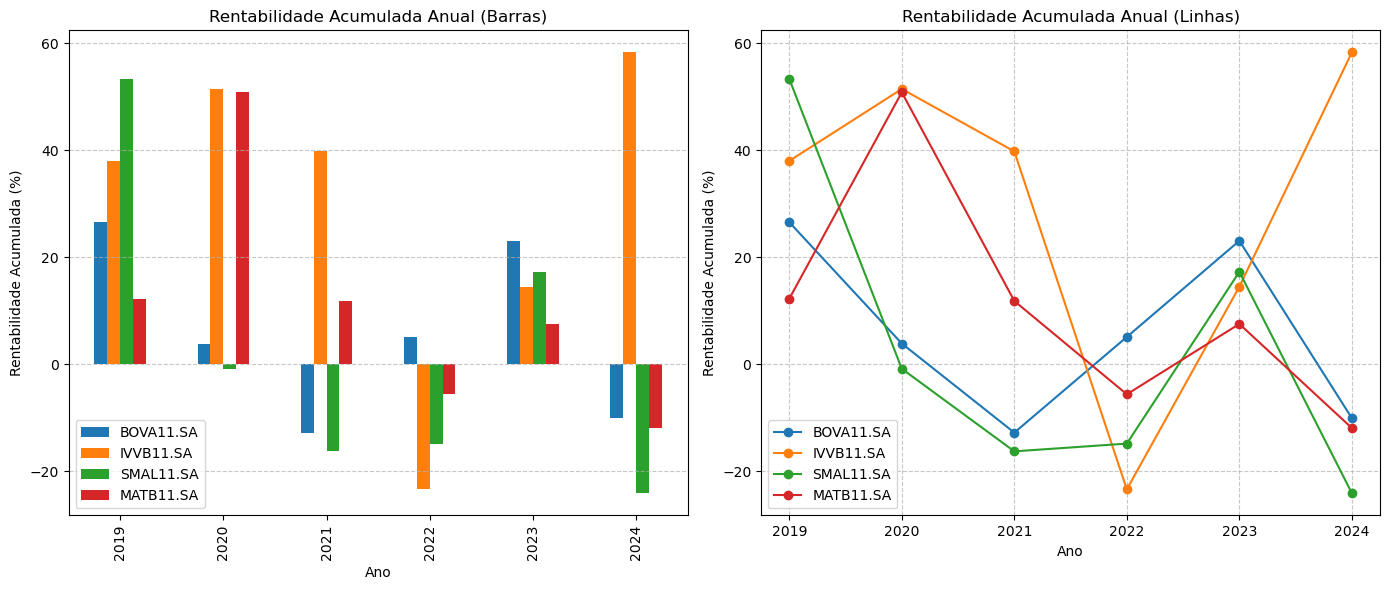

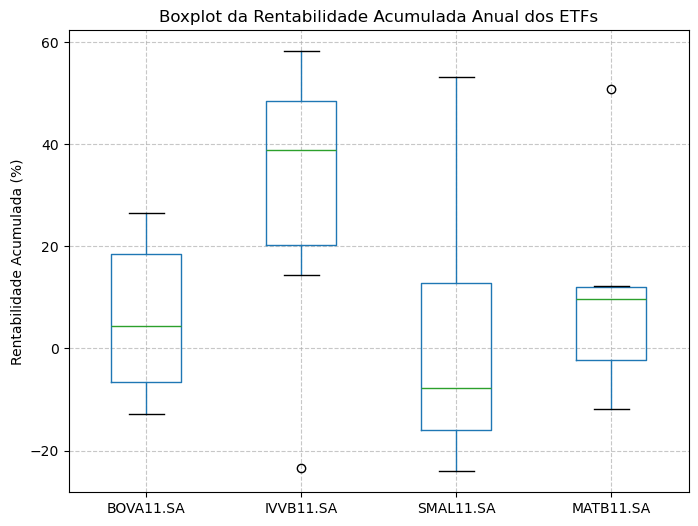

In [21]:
# --- Gráficos lado a lado (Barras e Linhas) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Barras
rent_anual.plot(kind='bar', ax=axes[0])
axes[0].set_title('Rentabilidade Acumulada Anual (Barras)')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Rentabilidade Acumulada (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de Linhas
for ticker in rent_anual.columns:
    axes[1].plot(rent_anual.index, rent_anual[ticker], marker='o', label=ticker)
axes[1].set_title('Rentabilidade Acumulada Anual (Linhas)')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Rentabilidade Acumulada (%)')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()

# --- Boxplot ---
plt.figure(figsize=(8, 6))
rent_anual.boxplot()
plt.title('Boxplot da Rentabilidade Acumulada Anual dos ETFs')
plt.ylabel('Rentabilidade Acumulada (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Rentabilidade acumulada

In [24]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.sort_values('Date')

# Criar um dicionário para armazenar a rentabilidade acumulada diária
rent_acumulada = {}

# Calcular a rentabilidade acumulada para cada ETF
for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"
    rent_acumulada[ticker] = (1 + dados[coluna_retorno]).cumprod() - 1

# Adicionar as colunas de rentabilidade acumulada ao DataFrame original
for ticker in tickers:
    dados[f"Rentabilidade Acumulada {ticker}"] = rent_acumulada[ticker]

# Exibir o DataFrame com as novas colunas
display(dados[['Date'] + [f"Rentabilidade Acumulada {ticker}" for ticker in tickers]])

Price,Date,Rentabilidade Acumulada BOVA11.SA,Rentabilidade Acumulada IVVB11.SA,Rentabilidade Acumulada SMAL11.SA,Rentabilidade Acumulada MATB11.SA
Ticker,,,,,
0,2019-01-02,NaN,NaN,NaN,NaN
1,2019-01-03,0.001138,-0.025169,0.000000,-0.029851
2,2019-01-04,0.006826,-0.008158,0.016854,0.012749
3,2019-01-07,0.006598,0.006267,-0.008989,0.010261
4,2019-01-08,0.010580,0.006765,-0.001910,0.005908
...,...,...,...,...,...
1474,2024-12-20,0.354380,3.013629,-0.000225,0.713552
1475,2024-12-23,0.339022,3.113609,-0.037079,0.711379
1476,2024-12-26,0.341979,3.150418,-0.039663,0.714173


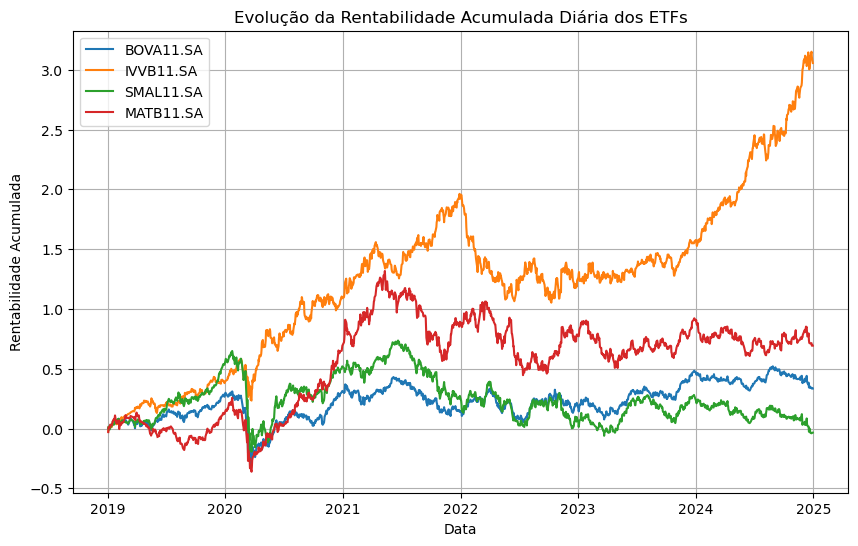

In [26]:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(dados['Date'], dados[f"Rentabilidade Acumulada {ticker}"], label=ticker)

plt.xlabel('Data')
plt.ylabel('Rentabilidade Acumulada')
plt.title('Evolução da Rentabilidade Acumulada Diária dos ETFs')
plt.legend()
plt.grid(True)

# Salvar o gráfico antes de mostrar na tela
plt.savefig("rentabilidade_acumulada.png", dpi=300, bbox_inches='tight')  

plt.show()

In [27]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.sort_values('Date')

dados['Year'] = dados['Date'].dt.year


annual_rentabilidade = {}

for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"
    if coluna_retorno not in dados.columns:
        raise ValueError(f"Coluna {coluna_retorno} não encontrada!")
    
    
    annual_rentabilidade[ticker] = dados.groupby('Year')[coluna_retorno].apply(
        lambda x: (1 + x.dropna()).prod() - 1
    )


annual_df = pd.DataFrame(annual_rentabilidade)
annual_df.index.name = 'Year'
annual_df.reset_index(inplace=True)
annual_df

,Year,BOVA11.SA,IVVB11.SA,SMAL11.SA,MATB11.SA
0,2019,0.265415,0.379925,0.533034,0.122501
1,2020,0.038838,0.514238,-0.008355,0.508020
2,2021,-0.127650,0.397639,-0.162602,0.118284
3,2022,0.051091,-0.233547,-0.148102,-0.056084
4,2023,0.230675,0.144933,0.172814,0.075400
5,2024,-0.100621,0.582625,-0.240724,-0.119063


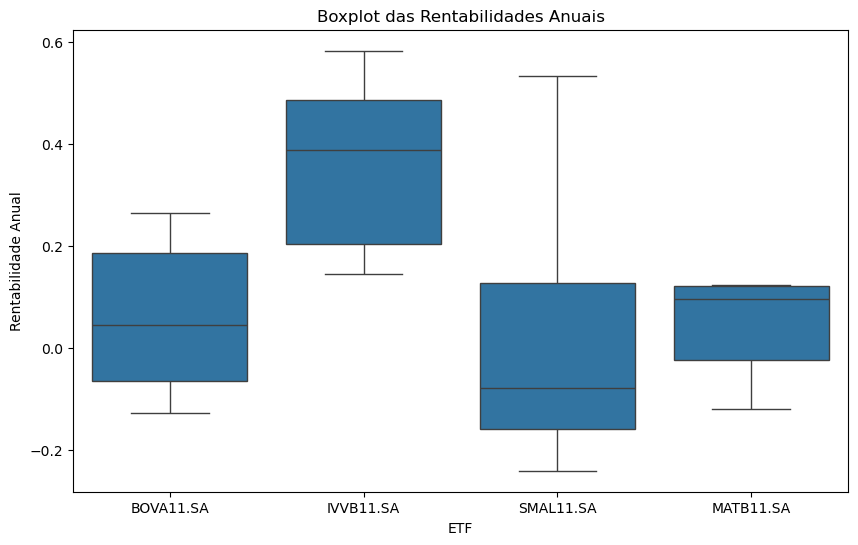

In [59]:
annual_df_melted = annual_df.melt(id_vars='Year', var_name='ETF', value_name='Rentabilidade Anual')

# Plotar o boxplot das rentabilidades acumuladas anuais
plt.figure(figsize=(10, 6))
sns.boxplot(x='ETF', y='Rentabilidade Anual', data=annual_df_melted, showfliers=False)
plt.title('Boxplot das Rentabilidades Anuais')
plt.xlabel('ETF')
plt.ylabel('Rentabilidade Anual')

# Salvar o gráfico antes de mostrar na tela
plt.savefig("rentabilidade_boxplot.png", dpi=300, bbox_inches='tight')  

plt.show()

### Rentabilidade Acumulada
A rentabilidade acumulada mede a performance total do ativo no período de tempo analisado, considerando ganhos e perdas levando em conta a _compouding_ ou seja, o efeito de juros sobre juros.
Dessa forma, temos, de 2019 a 2024, uma performance muito superior do IVVB11, o que é perfeitamente normal, tendo em vista que as empresas que o compõem são as 500 maiores empresas americanas de capital aberto, a robustez da economia americana e dessas empresas não torna justa uma comparação direta.
BOVA11 e MATB11 performam valores de mediana muito próximos nos retornos acumulados, mas com certa vantagem para o BOVA11, que apresenta valores gerais mais altos, apesar de maior volatilidade nesses valores.
SMAL11 apresenta a performance mais baixa, com mediana de rentabilidade acumulada negativa e alta volatilidade. Levando-se em conta o período de tempo em questão e a natureza das empresas que compõem o ETF, esse comportamento é natural e esperado.

# Desvio padrão dos retornos
## (medida de volatilidade)
A volatilidade de um ativo mede o seu risco, vamos calcular a volatilidade de cada um dos nossos ativos e definir quais apresentam mais estabilidade e quais apresentam maior risco de investimento.

In [34]:
desvio_padrao = {}

for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"
    # Calcula o desvio padrão diário e converte para porcentagem
    desvio_diario = dados[coluna_retorno].std() * 100  
    # Anualiza o desvio padrão: multiplica o valor diário em % por sqrt(252)
    desvio_anualizado = desvio_diario * np.sqrt(252)
    
    desvio_padrao[ticker] = {
        'Desvio Padrão Diário (%)': desvio_diario,
        'Desvio Padrão Anualizado (%)': desvio_anualizado
    }

# Transforma o dicionário em DataFrame, com os tickers como índice
df_desvio_padrao = pd.DataFrame(desvio_padrao).T.round(2)
df_desvio_padrao

,Desvio Padrão Diário (%),Desvio Padrão Anualizado (%)
BOVA11.SA,1.57,24.98
IVVB11.SA,1.34,21.32
SMAL11.SA,1.90,30.10
MATB11.SA,1.84,29.17


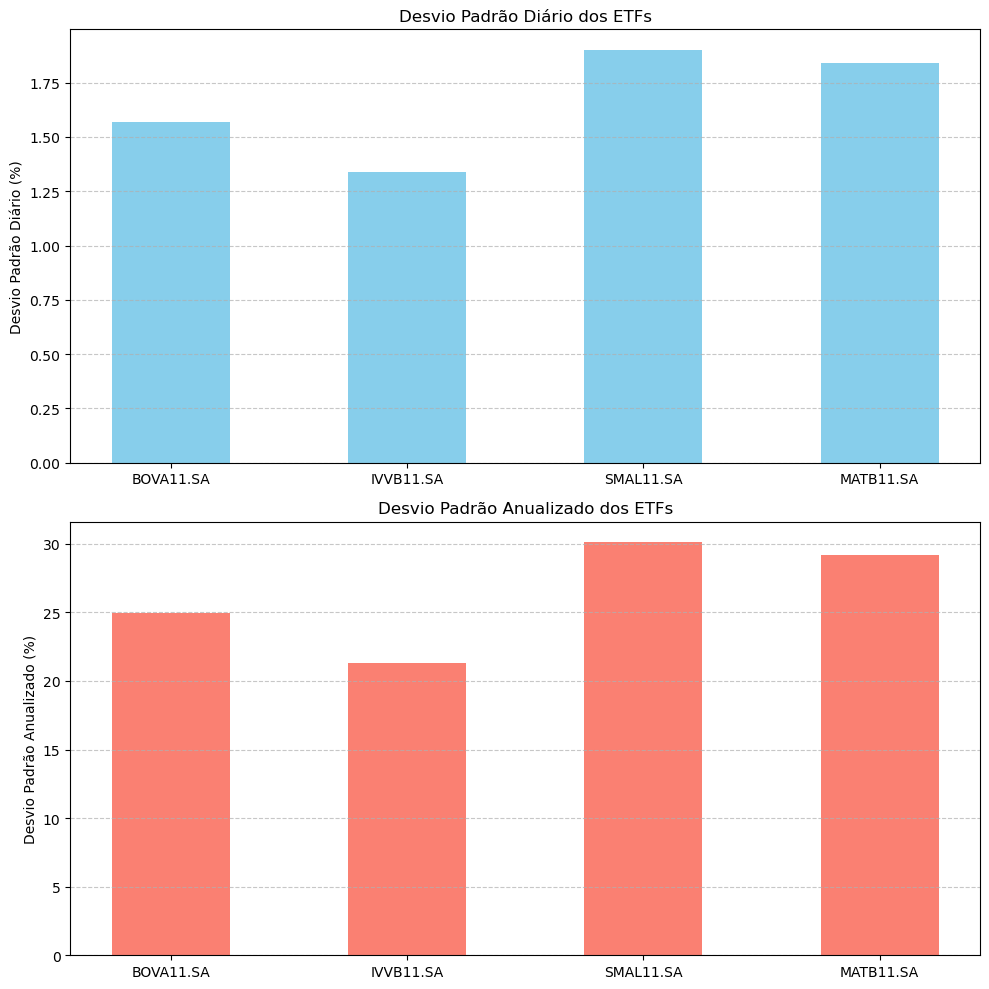

In [65]:
labels = df_desvio_padrao.index
daily = df_desvio_padrao['Desvio Padrão Diário (%)']
annual = df_desvio_padrao['Desvio Padrão Anualizado (%)']

x = np.arange(len(labels))  # Posições para os tickers
width = 0.5  # Largura das barras

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico para o desvio padrão diário
ax1.bar(x, daily, width, color='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel('Desvio Padrão Diário (%)')
ax1.set_title('Desvio Padrão Diário dos ETFs')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para o desvio padrão anualizado
ax2.bar(x, annual, width, color='salmon')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel('Desvio Padrão Anualizado (%)')
ax2.set_title('Desvio Padrão Anualizado dos ETFs')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Salvar o gráfico antes de mostrar na tela
plt.savefig("desvio padrão.png", dpi=300, bbox_inches='tight') 

plt.tight_layout()
plt.show()

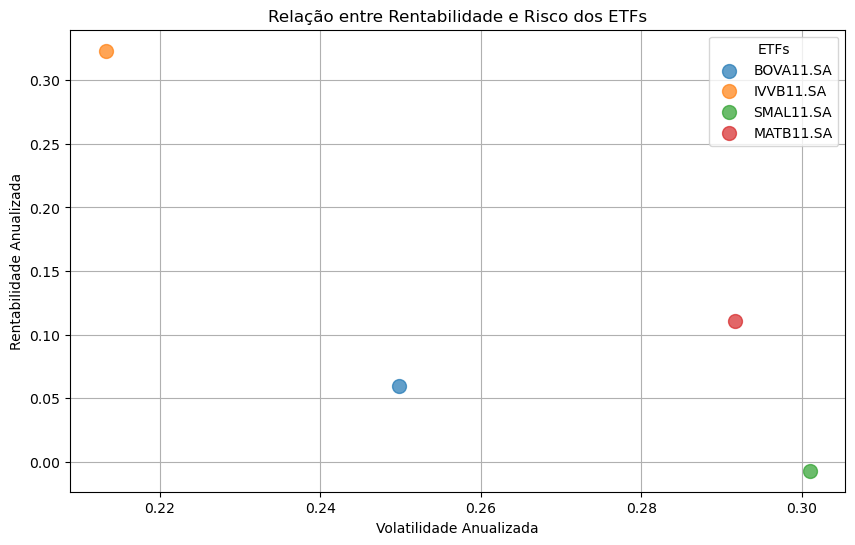

In [63]:
# Calculando a Volatilidade Anualizada
volatilidade = {}
for ticker in tickers:
    volatilidade[ticker] = dados[f"Retorno Diário {ticker}"].std() * np.sqrt(252)  # Volatilidade anualizada

# Calculando o Retorno Anualizado
retorno_medio_ano = {}
for ticker in tickers:
    retorno_medio_ano[ticker] = (1 + dados[f"Retorno Acumulado {ticker}"].iloc[-1]) ** (1 / (dados['Date'].dt.year.max() - dados['Date'].dt.year.min())) - 1

# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.scatter(volatilidade[ticker], retorno_medio_ano[ticker], label=ticker, s=100, alpha=0.7)

plt.title('Relação entre Rentabilidade e Risco dos ETFs')
plt.xlabel('Volatilidade Anualizada')
plt.ylabel('Rentabilidade Anualizada')
plt.legend(title='ETFs')
plt.grid(True)

# Salvar o gráfico antes de mostrar na tela
plt.savefig("rentabilidade_risco.png", dpi=300, bbox_inches='tight')  

plt.show()

___O desvio padrão mede o quanto os valores oscilam, nos nossos exemplos, de forma diária e anual, portanto, valores mais altos significam uma maior oscilação, maior volatilidade e maior risco; valores menores, menor oscilação, menor volatilidade, maior estabilidade, maior segurança.___
### Risco e Estabilidade
Confirmando o que se suspeitava pelos cálculos de retorno, temos no SMALL11 o maior risco dentre os ETFs analisados, 30,1%; seguido de perto pelo MATB11, com 29,17%. BOVA11 performa 24,98% e IVVB11 se mostra o mais estável no grupo, com 21,32%, bem próximo do BOVA11, indicando que, apesar do IVVB11 apresentar maiores retornos, o risco entre ambos é muito parecido. <br>

__IVVB11 pode ser mais atrativo para investidores mais conservadores; <br>
enquanto os demais podem ser mais interessantes para aqueles que toleram um risco mais elevado.__

------------------------

# Sharpe Ratio
## Retorno ajustado ao risco
O **Sharpe Ratio** mede o quanto de retorno você obtém vs. o nível de risco (volatilidade), em termos gerais, um alto Sharpe Ratio significa que o ativo oferece maiores retornos com menores riscos.

In [41]:
risk_free_rate = 0.0

# Criar um dicionário para armazenar o Sharpe Ratio de cada ETF
sharpe_ratio = {}

# Calcular o Sharpe Ratio para cada ETF
for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"
    # Média dos retornos diários
    mean_return = dados[coluna_retorno].mean()
    # Volatilidade diária (desvio padrão)
    std_return = dados[coluna_retorno].std()
    # Calcular o Sharpe Ratio diário e anualizar
    sharpe_diario = (mean_return - risk_free_rate) / std_return
    sharpe_anualizado = sharpe_diario * np.sqrt(252)
    sharpe_ratio[ticker] = sharpe_anualizado

# Transformar o dicionário em DataFrame para exibir de forma organizada
df_sharpe = pd.DataFrame(sharpe_ratio, index=['Sharpe Ratio Anualizado']).T.round(2)
df_sharpe

,Sharpe Ratio Anualizado
BOVA11.SA,0.32
IVVB11.SA,1.23
SMAL11.SA,0.13
MATB11.SA,0.46


O Risk-Free Ratem no início do código acima (e abaixo) é um parâmetro de referência, no Brasil costuma-se usar o valor da taxa Selic aqui; acima, utilizamos um RFR de 0, desconsiderando custo de oportunidade, abaixo, utilizamos o valor da taxa Selic ao final de 2024, o que nos possibilita um olhar mais realista de risco x retorno desses ativos para o período.

In [44]:
risk_free_rate = 0.1225 / 252

# Criar um dicionário para armazenar o Sharpe Ratio de cada ETF
sharpe_ratio = {}

# Calcular o Sharpe Ratio para cada ETF
for ticker in tickers:
    coluna_retorno = f"Retorno Diário {ticker}"
    # Média dos retornos diários
    mean_return = dados[coluna_retorno].mean()
    # Volatilidade diária (desvio padrão)
    std_return = dados[coluna_retorno].std()
    # Calcular o Sharpe Ratio diário e anualizar
    sharpe_diario = (mean_return - risk_free_rate) / std_return
    sharpe_anualizado = sharpe_diario * np.sqrt(252)
    sharpe_ratio[ticker] = sharpe_anualizado

# Transformar o dicionário em DataFrame para exibir de forma organizada
df_sharpe = pd.DataFrame(sharpe_ratio, index=['Sharpe Ratio Anualizado']).T.round(2)
df_sharpe

,Sharpe Ratio Anualizado
BOVA11.SA,-0.17
IVVB11.SA,0.65
SMAL11.SA,-0.27
MATB11.SA,0.04


### Interpretação
IVVB11 performa os melhores valores de Sharpe Ratio; de longe, mas ainda com valores positivos (acima da Selic) temos o MATB11.
BOVA11 e SMAL11 apresentaram Sharpe Ratio negativo para o período analisado, ou seja, o investidor teria perdido dinheiro no período indicado em nossa análise, sendo melhor recompensado com investimentos de renda fixa, em comparação com os ETFs em questão

--------------

# Sortino Ratio
Enquanto o Sharpe Ratio nos mostra o quanto o ativo paga pelo risco, o Sortino Ratio vai nos dizer se os ganhos superam as perdas.
Sharpe Ratio mede a volatilidade como um todo, ou seja, todas as oscilaçõ, positivas ou negativases. O Sortino mede com base nos movimentos negativos, apenas, ou seja perda real..

In [47]:
# Taxa livre de risco (Selic 2024, por exemplo)
risk_free_rate =0.1225 

# Função para calcular o Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0):
    # Calculando o retorno esperado (média)
    mean_return = np.mean(returns)
    
    # Calculando a volatilidade negativa (downside risk)
    downside_returns = returns[returns < 0]
    downside_deviation = np.std(downside_returns)
    
    # Sortino Ratio = (Média do Retorno - Taxa Livre de Risco) / Volatilidade Negativa
    sortino = (mean_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan
    
    return sortino

# Calculando o Sortino Ratio para os retornos diários de cada ETF
sortino_ratios = {}

for ticker in tickers:
    # Pegando os retornos diários do ETF
    daily_returns = dados[f"Retorno Diário {ticker}"].dropna()
    
    # Calculando o Sortino Ratio para cada ativo
    sortino_ratios[ticker] = sortino_ratio(daily_returns)

# Exibindo o Sortino Ratio para cada ETF
sortino_ratios_df = pd.DataFrame(list(sortino_ratios.items()), columns=["ETF", "Sortino Ratio"])
display(sortino_ratios_df)

,ETF,Sortino Ratio
0,BOVA11.SA,0.024734
1,IVVB11.SA,0.118475
2,SMAL11.SA,0.010368
3,MATB11.SA,0.038027


## Interpretação
O Sortino Ratio nos mostra as mesmas conclusões que o Sharpe; IVVB11 na frente, indicando menores perdas em relação aos retornos.
SMALL11 apresenta, também aqui, os menores valores de Sortino Ratio, mostrando mais perdas x retornos.

-----------------

## Conclusões
### Qual ETF teve melhor desempenho ao longo do tempo?
#### IVVB11
***IVVB11 apresenta os maiores retornos/rentabilidade e menor risco.***

--------------

### Quais ETFs são mais voláteis e apresentam maior risco?
#### SMAL11
***SMAL11 apresenta os maiores valores de volatilidade (medida associada ao risco) e menores Sharpe e Sortino Ratio, ou seja, menor lucratividade vs risco (Sharpe) e menos lucratividade vs percas.***
#### MATB11 & BOVA11
***MATB11 apresenta a segunda maior volatilidade. Mas apresenta Sharpe Ratio e Sortino acima dos valores da BOVA11, portando, ainda que a volatilidade (risco) associada a BOVA11 seja maior, MATB11 paga melhor pelo risco assumido.***
#### IVVB11
***IVVB11 performou os menores valores de volatilidade e maiores Sharpe e Sortino Ratio. Se consolida como o ativo mais estável e com melhor retorno x risco dentre os ativos analisados.***

--------------------

## Conclusão Final:
* Investidores que buscam mais risco e potencial de crescimento podem achar o SMAL11 atraente, embora isso implique maior exposição à volatilidade. <br>
* Já BOVA11 e MATB11 mostraram um equilíbrio entre risco e retorno, com MATB11 oferecendo uma compensação melhor para o risco assumido. <br>
<br>

**Essa análise é para fins educacionais e informativos apenas, e não deve ser considerada como sugestão de investimento.**

--------------------------